=== Laporan Analisis Transaksi Blockchain Mangrove: Studi Kasus 2 ===

Ringkasan:
Scatter plot 3D ini, bagian dari Studi Kasus 2 yang berisi memvisualisasikan hubungan antara dana investasi (Amount_IDR), penyerapan CO2 (CO2_Sequestration_Tonnes), dan keamanan transaksi (Encryption_Level) menggunakan data transaksi blockchain dari file CSV.

Temuan Utama:
- Jumlah dana (60–70 juta IDR) memiliki hubungan linier dengan penyerapan CO2 (600–700 ton), dengan efisiensi konstan 10 ton per juta IDR, menunjukkan dampak pendanaan yang konsisten di seluruh proyek (misalnya, C004, C010).
- Kementerian LHK mendanai tiga proyek (C004, C010, C016), sedangkan Yayasan Hijau mendanai satu proyek (C019), semua dengan enkripsi tingkat tinggi (High), menunjukkan keamanan yang kuat untuk transaksi pemerintah dan NGO.
- Semua proyek menggunakan enkripsi tingkat tinggi (kode=3), sejalan dengan penekanan PDF pada sistem blockchain yang aman untuk pengelolaan kredit karbon .

Kesimpulan:
Tingkat enkripsi tinggi 

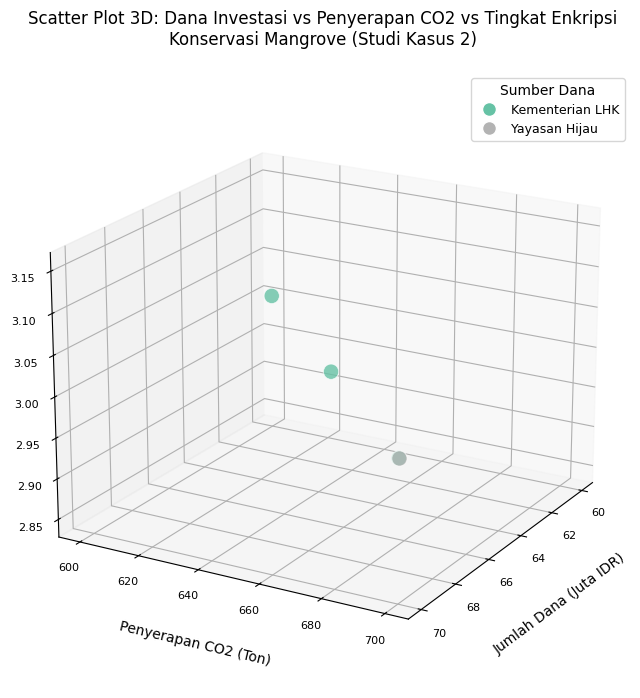

In [8]:
# Library yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Baca data dari CSV
df = pd.read_csv("D:/Table SQL yang udh jadi/2. Query 3.csv")

# Memastikan kolom numerik dalam tipe float
df['amount_idr'] = df['amount_idr'].astype(float)
df['co2_sequestration_tonnes'] = df['co2_sequestration_tonnes'].astype(float)

# Encode 'encryption_level' secara manual: High=3, Medium=2, Low=1
def encode_encryption_level(level):
    level = str(level).lower()  # Menangani ketidakkonsistenan kapitalisasi
    if level == 'high':
        return 3
    elif level == 'medium':
        return 2
    elif level == 'low':
        return 1
    else:
        return 0  # Untuk nilai tak terduga

df['encryption_level_code'] = df['encryption_level'].apply(encode_encryption_level)

# Skala amount_idr ke juta IDR untuk visualisasi
df['amount_idr_million'] = df['amount_idr'] / 1_000_000

# Buat warna yang berbeda untuk mengetahui sumber dana (source_name)
unique_sources = df['source_name'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_sources)))  # Palet Set2 untuk warna berbeda
source_color_map = dict(zip(unique_sources, colors))

# Buat Scatter Plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot scatter dengan warna berdasarkan sumber dana (source_name)
for source in unique_sources:
    mask = df['source_name'] == source
    ax.scatter(
        df[mask]['amount_idr_million'],
        df[mask]['co2_sequestration_tonnes'],
        df[mask]['encryption_level_code'],
        c=[source_color_map[source]],
        label=source,
        s=120,
        alpha=0.8,
        edgecolors='w',
        linewidth=0.5
    )

# Label sumbu
ax.set_xlabel("Jumlah Dana (Juta IDR)", fontsize=10, labelpad=15)
ax.set_ylabel("Penyerapan CO2 (Ton)", fontsize=10, labelpad=15)
ax.set_zlabel("Tingkat Enkripsi (3=High, 2=Medium, 1=Low)", fontsize=10, labelpad=15)

# Judul
ax.set_title("Scatter Plot 3D: Dana Investasi vs Penyerapan CO2 vs Tingkat Enkripsi\nKonservasi Mangrove (Studi Kasus 2)", fontsize=12, pad=20)

# Buat legenda
legend_labels = unique_sources
legend_colors = [source_color_map[source] for source in unique_sources]
custom_lines = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                           markerfacecolor=color, markersize=10)
                for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=custom_lines, title="Sumber Dana", loc='upper right', fontsize=9)

# Tambahkan grid dan atur tampilan
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=8)

# Atur sudut pandang untuk kejelasan
ax.view_init(elev=20, azim=30)


# Cetak Kesimpulan dari hasil analisa
print("=== Laporan Analisis Transaksi Blockchain Mangrove: Studi Kasus 2 ===")
print("\nRingkasan:")
print("Scatter plot 3D ini, bagian dari Studi Kasus 2 yang berisi memvisualisasikan hubungan antara dana investasi (Amount_IDR), penyerapan CO2 (CO2_Sequestration_Tonnes), dan keamanan transaksi (Encryption_Level) menggunakan data transaksi blockchain dari file CSV.")
print("\nTemuan Utama:")
print("- Jumlah dana (60–70 juta IDR) memiliki hubungan linier dengan penyerapan CO2 (600–700 ton), dengan efisiensi konstan 10 ton per juta IDR, menunjukkan dampak pendanaan yang konsisten di seluruh proyek (misalnya, C004, C010).")
print("- Kementerian LHK mendanai tiga proyek (C004, C010, C016), sedangkan Yayasan Hijau mendanai satu proyek (C019), semua dengan enkripsi tingkat tinggi (High), menunjukkan keamanan yang kuat untuk transaksi pemerintah dan NGO.")
print("- Semua proyek menggunakan enkripsi tingkat tinggi (kode=3), sejalan dengan penekanan PDF pada sistem blockchain yang aman untuk pengelolaan kredit karbon .")
print("\nKesimpulan:")
print("Tingkat enkripsi tinggi dan efisiensi pendanaan yang konsisten mendukung penyerapan CO2 yang signifikan, sejalan dengan KPI keberlanjutan (misalnya, pengurangan CO2 yang tinggi). Pembuat kebijakan harus mempromosikan sistem blockchain yang aman (berdasarkan UU No. 32/2009) dan mendorong keragaman sumber dana untuk meningkatkan hasil konservasi mangrove.")